<a href="https://colab.research.google.com/github/TarrySingh/Artificial-Intelligence-Deep-Learning-Machine-Learning-Tutorials/blob/master/TensorFlow_2_0_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Notebook is for an article on [ML From Scratch](https://mlfromscratch.com/p/18322acd-0bb7-4355-b45a-47d442fd2429/).

- Update your TensorFlow version to 2.0 (CPU and GPU)
- Verify that you are running TensorFlow 2.0
- Verify if running eager execution
- Common Use operations
- Linear algebra operations
- Calculating Gradients
- Functions in TensorFlow
- Building a Neural Network with TensorFlow 2.0

# Update your TensorFlow version to 2.0 (CPU and GPU)
Here we can use pip with an exclamation mark to run pip commands. Firstly, we specify for pip to upgrade both the tensorflow CPU version, and then the tensorflow GPU version, to version 2.0.0 or later.

After updating to 2.0.0 or later, we can simply import tensorflow and start running commands.

In [1]:
#!pip install --upgrade tensorflow
!pip install --upgrade tensorflow-gpu
import tensorflow as tf
assert tf.__version__ >= "2.0"

Requirement already up-to-date: tensorflow-gpu in /usr/local/lib/python3.6/dist-packages (2.0.0)


# Verify that you are running TensorFlow 2.0
With good reason, you would want to check which tensorflow version you are running, such that you can ensure the right version is installed. For this tutorial, the below should say that your tensorflow version is 2.0.0 or later.

In [2]:
print(('Your TensorFlow version: {0}').format(tf.__version__))

Your TensorFlow version: 2.0.0


# Verify if running eager execution
Eager execution is a fairly new addition to the tensorflow framework, thus we wish to check if eager execution is enabled or disabled.

In [3]:
if(tf.executing_eagerly()):
    print('Eager execution is enabled (running operations immediately)\n')
    print(('Turn eager execution off by running: \n{0}\n{1}').format('' \
        'from tensorflow.python.framework.ops import disable_eager_execution', \
        'disable_eager_execution()'))
else:
    print('You are not running eager execution. TensorFlow version >= 2.0.0' \
          'has eager execution enabled by default.')
    print(('Turn on eager execution by running: \n\n{0}\n\nOr upgrade '\
           'your tensorflow version by running:\n\n{1}').format(
           'tf.compat.v1.enable_eager_execution()',
           '!pip install --upgrade tensorflow\n' \
           '!pip install --upgrade tensorflow-gpu'))

Eager execution is enabled (running operations immediately)

Turn eager execution off by running: 
from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()


# Verify if GPU is available and ready to be used

In [4]:
print(('Is your GPU available for use?\n{0}').format(
    'Yes, your GPU is available: True' if tf.test.is_gpu_available() == True else 'No, your GPU is NOT available: False'
))

print(('\nYour devices that are available:\n{0}').format(
    [device.name for device in tf.config.experimental.list_physical_devices()]
))

# A second method for getting devices:
#from tensorflow.python.client import device_lib
#print([device.name for device in device_lib.list_local_devices() if device.name != None])

Is your GPU available for use?
Yes, your GPU is available: True

Your devices that are available:
['/physical_device:CPU:0', '/physical_device:XLA_CPU:0', '/physical_device:XLA_GPU:0', '/physical_device:GPU:0']


## Using specific devices

In [5]:
import time

cpu_slot = 0
gpu_slot = 0

# Using CPU at slot 0
with tf.device('/CPU:' + str(cpu_slot)):
    # Starting a timer
    start = time.time()

    # Doing operations on CPU
    A = tf.constant([[3, 2], [5, 2]])
    print(tf.eye(2,2))

    # Printing how long it took with CPU
    end = time.time() - start
    print(end)

# Using the GPU at slot 0
with tf.device('/GPU:' + str(gpu_slot)):
    # Starting a timer
    start = time.time()

    # Doing operations on GPU
    A = tf.constant([[3, 2], [5, 2]])
    print(tf.eye(2,2))

    # Printing how long it took with GPU
    end = time.time() - start
    print(end)

tf.Tensor(
[[1. 0.]
 [0. 1.]], shape=(2, 2), dtype=float32)
0.0035669803619384766
tf.Tensor(
[[1. 0.]
 [0. 1.]], shape=(2, 2), dtype=float32)
0.6257212162017822


# Simple Operations

We need to know the basic operations in tensorflow, in order to be able to use tensorflow for most of our work.

## Common Use
This is some of the common functions from tensorflow, that you will probably need to use at some point.

* Making tensors `tf.constant` and `tf.Variable`
* Concatenation of two tensors by `tf.concat`
* Making tensors by `tf.zeros` or `tf.ones`
* Reshape data by `tf.reshape`
* Casting tensors to other data types by `tf.cast`

### Concatenation by `tf.concat` and making tensors by `tf.constant`

In [6]:

# Making a constant tensor A, that does not change
A = tf.constant([[3, 2],
                 [5, 2]])

# Making a Variable tensor VA, which can change. Notice it's .Variable
VA = tf.Variable([[3, 2],
                 [5, 2]])

# Making another tensor B
B = tf.constant([[9, 5],
                 [1, 3]])

# Concatenate columns
AB_concatenated = tf.concat(values=[A, B], axis=1)
print(('Adding B\'s columns to A:\n{0}').format(
    AB_concatenated.numpy()
))

# Concatenate rows
AB_concatenated = tf.concat(values=[A, B], axis=0)
print(('\nAdding B\'s rows to A:\n{0}').format(
    AB_concatenated.numpy()
))

Adding B's columns to A:
[[3 2 9 5]
 [5 2 1 3]]

Adding B's rows to A:
[[3 2]
 [5 2]
 [9 5]
 [1 3]]


### Making tensors by `tf.zeros` and `tf.ones`

In [7]:
# Making a tensor filled with zeros. shape=[rows, columns]
tensor = tf.zeros(shape=[3, 4], dtype=tf.int32)
print(('Tensor full of zeros as int32, 3 rows and 4 columns:\n{0}').format(
    tensor.numpy()
))

# Making a tensor filled with zeros with data type of float32
tensor = tf.ones(shape=[5, 3], dtype=tf.float32)
print(('\nTensor full of ones as float32, 5 rows and 3 columns:\n{0}').format(
    tensor.numpy()
))

Tensor full of zeros as int32, 3 rows and 4 columns:
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]

Tensor full of ones as float32, 5 rows and 3 columns:
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


### Reshape data by `tf.reshape`

Say we have an image of 28x28 pixels, as in the MNIST dataset, then we could reshape the number of pixels, which would reduce the number of dimensions.



In [8]:
# Making a tensor for reshaping
tensor = tf.constant([[3, 2],
                      [5, 2],
                      [9, 5],
                      [1, 3]])

# Reshaping the tensor into a shape of: shape = [rows, columns]
reshaped_tensor = tf.reshape(tensor = tensor,
                             shape = [1, 8])

print(('Tensor BEFORE reshape:\n{0}').format(
    tensor.numpy()
))
print(('\nTensor AFTER reshape:\n{0}').format(
    reshaped_tensor.numpy()
))

Tensor BEFORE reshape:
[[3 2]
 [5 2]
 [9 5]
 [1 3]]

Tensor AFTER reshape:
[[3 2 5 2 9 5 1 3]]


### Casting tensors to other data types by `tf.cast`

In [9]:
# Making a tensor
tensor = tf.constant([[3.1, 2.8],
                      [5.2, 2.3],
                      [9.7, 5.5],
                      [1.1, 3.4]], 
                      dtype=tf.float32)

tensor_as_int = tf.cast(tensor, tf.int32)

print(('Tensor with floats:\n{0}').format(
    tensor.numpy()
))
print(('\nTensor cast from float to int (just remove the decimal, no rounding):\n{0}').format(
    tensor_as_int.numpy()
))

Tensor with floats:
[[3.1 2.8]
 [5.2 2.3]
 [9.7 5.5]
 [1.1 3.4]]

Tensor cast from float to int (just remove the decimal, no rounding):
[[3 2]
 [5 2]
 [9 5]
 [1 3]]


## The linear algebra operations

* Transpose tensor
* Matrix Multiplication
* Element-wise multiplication
* Identity Matrix
* Determinant
* Dot Product

### Transpose tensor

In [10]:
# Some Matrix A
A = tf.constant([[3, 7],
                 [1, 9]])

A = tf.transpose(A)

print(('The transposed matrix A:\n{0}').format(
    A
))

The transposed matrix A:
[[3 1]
 [7 9]]


### Matrix Multiplication

In [11]:
# Some Matrix A
A = tf.constant([[3, 7],
                 [1, 9]])

# Some vector v
v = tf.constant([[5],
                 [2]])

# Matrix multiplication of A.v^T
Av = tf.matmul(A, v)

print(('Matrix Multiplication of A and v results in a new Tensor:\n{0}').format(
    Av
))

Matrix Multiplication of A and v results in a new Tensor:
[[29]
 [23]]


### Element-wise multiplication

Let's simply compare matrix multiplication and element-wise multiplication, so that we can see, that they are actually different.

In [12]:
# Element-wise multiplication
Av = tf.multiply(A, v)

print(('Element-wise multiplication of A and v results in a new Tensor:\n{0}').format(
    Av
))

Element-wise multiplication of A and v results in a new Tensor:
[[15 35]
 [ 2 18]]


### Identity Matrix

In [13]:
# Some Matrix A
A = tf.constant([[3, 7],
                 [1, 9],
                 [2, 5]])

# Get number of dimensions
rows, columns = A.shape
print(('Get rows and columns in tensor A:\n{0} rows\n{1} columns').format(
    rows, columns
))

# Making identity matrix
A_identity = tf.eye(num_rows = rows,
                    num_columns = columns,
                    dtype = tf.int32)
print(('\nThe identity matrix of A:\n{0}').format(
    A_identity.numpy()
))

Get rows and columns in tensor A:
3 rows
2 columns

The identity matrix of A:
[[1 0]
 [0 1]
 [0 0]]


### Determinant

Computing the determinant includes casting any tensor values to a data type that fits the determinant operation in tensorflow. Let's see how this unfolds.

In [14]:
# Reusing Matrix A
A = tf.constant([[3, 7],
                 [1, 9]])

# Determinant must be: half, float32, float64, complex64, complex128
# Thus, we cast A to the data type float32
A = tf.dtypes.cast(A, tf.float32)

# Finding the determinant of A
det_A = tf.linalg.det(A)

print(('The determinant of A:\n{0}').format(
    det_A
))

The determinant of A:
20.000001907348633


### Dot Product

The dot product is one of the most essential pieces to linear algebra. It can be shown that for some tensors, we get the same outcome from `tf.matmul` from earlier and `tf.tensordot`.

In [15]:
# Defining a 3x3 matrix
A = tf.constant([[32, 83, 5],
                 [17, 23, 10],
                 [75, 39, 52]])

# Defining another 3x3 matrix
B = tf.constant([[28, 57, 20],
                 [91, 10, 95],
                 [37, 13, 45]])

# Finding the dot product
dot_AB = tf.tensordot(a=A, b=B, axes=1).numpy()

print(('Dot product of A.B^T results in a new Tensor:\n{0}').format(
    dot_AB
))

# Which is the same as matrix multiplication in this instance (axes=1)
# Matrix multiplication of A and B
AB = tf.matmul(A, B)

print(('\nMatrix Multiplication of A.B^T results in a new Tensor:\n{0}').format(
    AB
))

Dot product of A.B^T results in a new Tensor:
[[8634 2719 8750]
 [2939 1329 2975]
 [7573 5341 7545]]

Matrix Multiplication of A.B^T results in a new Tensor:
[[8634 2719 8750]
 [2939 1329 2975]
 [7573 5341 7545]]


# Calculating Gradients

When using gradient tape from TensorFlow, we need to create a `tf.Variable` and not `tf.constant`, because TensorFlow does not watch constants. The great thing about making variables is that we can use gradient tape at any time, and TensorFlow will automatically give us the gradient.


## Gradient Tape (Automatic Differentiation)

Let's make an example of the newer **GELU activation function**, used in OpenAI's GPT-2 and Google's BERT.

The GELU function:

$$
    \text{GELU}(x) = 0.5x\left(1+\text{tanh}\left(\sqrt{2/\pi}(x+0.044715x^3)\right)\right)
$$
<br><br>
GELU differentiated:

$$
    \text{GELU}'(x) = 0.5\text{tanh}(0.0356774x^3 + 0.797885 x) + (0.0535161 x^3 + 0.398942 x) \text{sech}^2(0.0356774x^3+0.797885x)+0.5
$$
<br><br>
If we input $x=0.5$ into the GELU function, we get the [following result](https://www.wolframalpha.com/input/?i=0.5tanh%280.0356774*0.5%5E3+%2B+0.797885*0.5%29+%2B+%280.0535161*0.5%5E3+%2B+0.398942*0.5%29sech%5E2%280.0356774*0.5%5E3%2B0.797885*0.5%29%2B0.5):

$$
GELU'(0.5) = 0.5tanh(0.0356774*0.5^3 + 0.797885*0.5) + (0.0535161*0.5^3 + 0.398942*0.5)sech^2(0.0356774*0.5^3+0.797885*0.5)+0.5 = 0.867370
$$

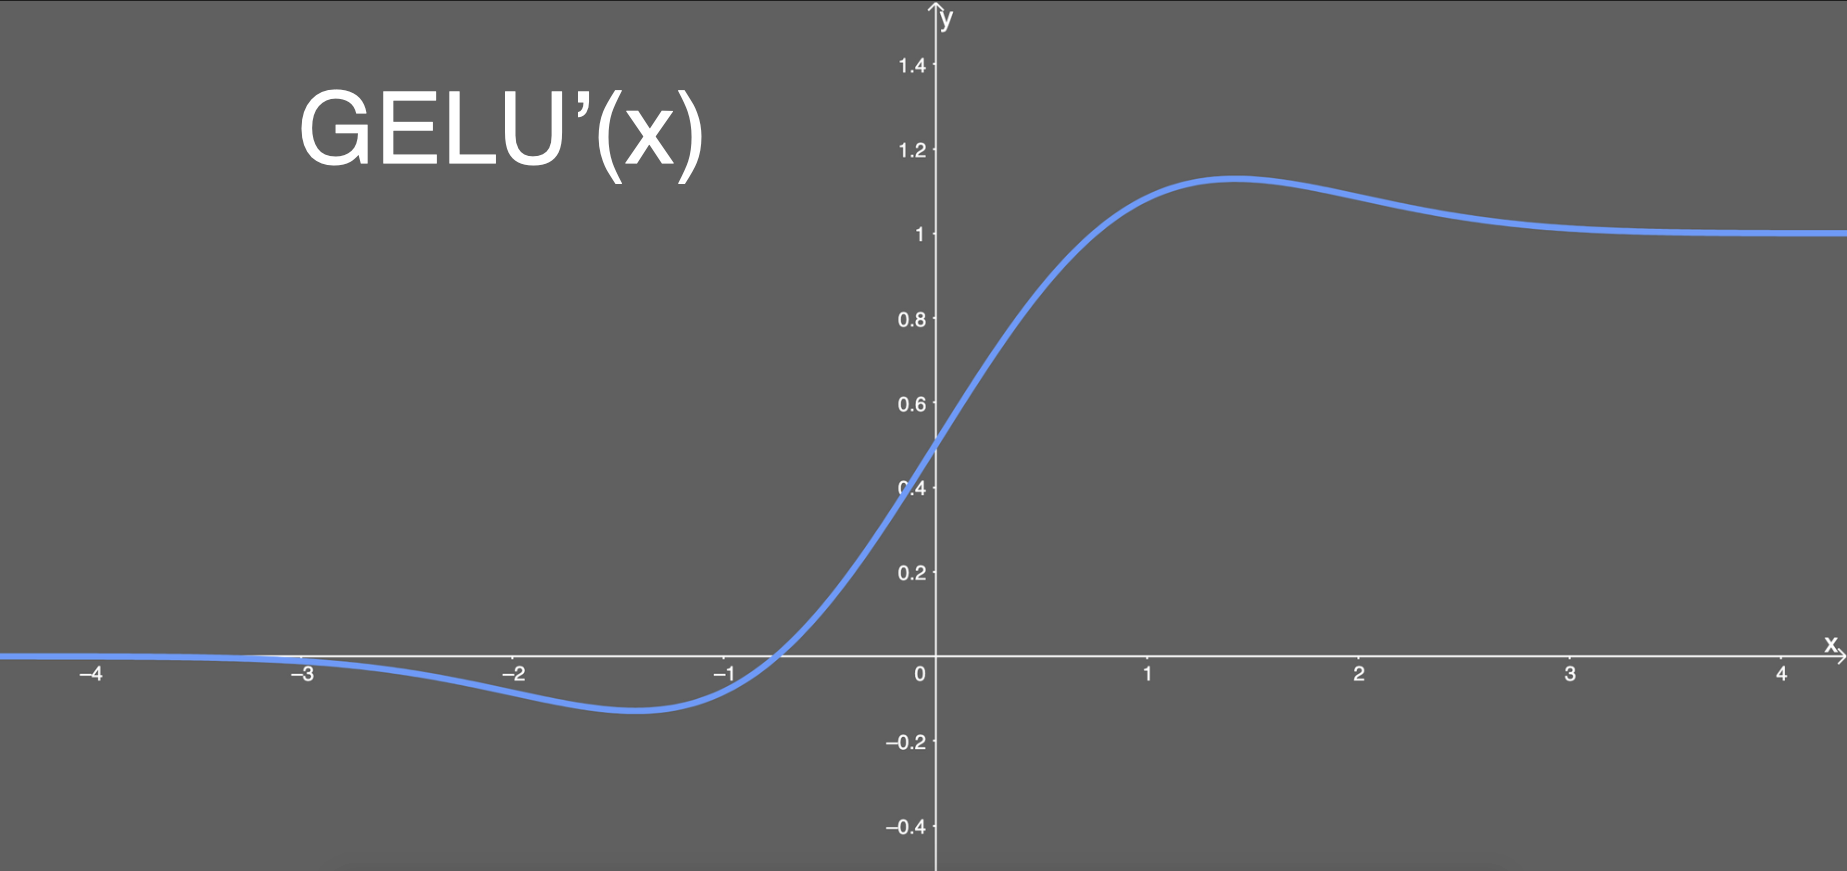

*<small>Image from ML From Scratch [Activation Functions post](https://mlfromscratch.com/activation-functions-explained/).</small>

In [16]:
import math

def gelu(x):
    return 0.5*x*(1+tf.tanh(tf.sqrt(2/math.pi)*(x+0.044715*tf.pow(x, 3))))

def get_gradient(x, activation_function):
    with tf.GradientTape() as gt:
        y = activation_function(x)

    gradient = gt.gradient(y, x).numpy()

    return gradient

x = tf.Variable(0.5)
gradient = get_gradient(x, gelu)

print('{0} is the gradient of GELU with x={1}'.format(
    gradient, x.numpy()
))

0.8673698902130127 is the gradient of GELU with x=0.5


# Functions in TensorFlow with `@tf.function`

This second last part is from some of the [documentation](https://www.tensorflow.org/guide/function#the_tffunction_decorator) on TensorFlow 2.0.

In [17]:
import timeit
conv_layer = tf.keras.layers.Conv2D(100, 3)

@tf.function
def conv_fn(image):
  return conv_layer(image)

image = tf.zeros([1, 200, 200, 100])
# warm up
conv_layer(image); conv_fn(image)

no_tf_fn = timeit.timeit(lambda: conv_layer(image), number=10)
with_tf_fn = timeit.timeit(lambda: conv_fn(image), number=10)
difference = no_tf_fn - with_tf_fn

print("Without tf.function: ", no_tf_fn)
print("With tf.function: ", with_tf_fn)
print("The difference: ", difference)

print("\nJust imagine when we have to do millions/billions of these calculations," \
      " then the difference will be HUGE!")
print("Difference times a billion: ", difference*1000000000)

Without tf.function:  0.00473199999987628
With tf.function:  0.0045583520000036515
The difference:  0.00017364799987262813

Just imagine when we have to do millions/billions of these calculations, then the difference will be HUGE!
Difference times a billion:  173647.99987262813


# Building a Neural Network with TensorFlow 2.0

For this last part, we are going to be providing a complete neural networks code example. Inspiration is taken from the [documentation](https://www.tensorflow.org/tutorials/quickstart/advanced), but is heavily modified. Follow this example, and you can customize your own neural network in tensorflow.

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

tf.keras.backend.set_floatx('float64')

mnist = tf.keras.datasets.mnist

# Load Data & Remove color channels
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add a channels dimension
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)).shuffle(10000).batch(32)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

In [0]:
class MyModel(Model):
    def __init__(self,
                 loss_object,
                 optimizer,
                 train_loss,
                 train_metric,
                 test_loss,
                 test_metric):
        '''
            Setting all the variables for our model.
        '''
        super(MyModel, self).__init__()
        self.conv1 = Conv2D(32, 3, activation='relu')
        self.flatten = Flatten()
        self.d1 = Dense(128, activation='relu')
        self.d2 = Dense(10, activation='softmax')

        self.loss_object = loss_object
        self.optimizer = optimizer
        self.train_loss = train_loss
        self.train_metric = train_metric
        self.test_loss = test_loss
        self.test_metric = test_metric

    def nn_model(self, x):
        '''
            Defining the architecture of our model. This is where we run 
            through our whole dataset and return it, when training and testing.
        '''
        x = self.conv1(x)
        x = self.flatten(x)
        x = self.d1(x)
        return self.d2(x)
    
    @tf.function
    def train_step(self, images, labels):
        '''
            This is a TensorFlow function, run once for each epoch for the
            whole input. We move forward first, then calculate gradients with
            Gradient Tape to move backwards.
        '''
        with tf.GradientTape() as tape:
            predictions = self.nn_model(images)
            loss = self.loss_object(labels, predictions)
        gradients = tape.gradient(loss, self.trainable_variables)
        optimizer.apply_gradients(zip(gradients, self.trainable_variables))

        self.train_loss(loss)
        self.train_metric(labels, predictions)

    @tf.function
    def test_step(self, images, labels):
        '''
            This is a TensorFlow function, run once for each epoch for the
            whole input.
        '''
        predictions = self.nn_model(images)
        t_loss = self.loss_object(labels, predictions)

        self.test_loss(t_loss)
        self.test_metric(labels, predictions)
    
    def fit(self, train, test, epochs):
        '''
            This fit function runs training and testing.
        '''
        for epoch in range(epochs):
            for images, labels in train:
                self.train_step(images, labels)

            for test_images, test_labels in test:
                self.test_step(test_images, test_labels)

            template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
            print(template.format(epoch+1,
                                  self.train_loss.result(),
                                  self.train_metric.result()*100,
                                  self.test_loss.result(),
                                  self.test_metric.result()*100))

            # Reset the metrics for the next epoch
            self.train_loss.reset_states()
            self.train_metric.reset_states()
            self.test_loss.reset_states()
            self.test_metric.reset_states()

In [0]:
# Make a loss object
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()

# Select the optimizer
optimizer = tf.keras.optimizers.Adam()

# Specify metrics for training
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_metric = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

# Specify metrics for testing
test_loss = tf.keras.metrics.Mean(name='test_loss')
test_metric = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

# Create an instance of the model
model = MyModel(loss_object = loss_object,
                optimizer = optimizer,
                train_loss = train_loss,
                train_metric = train_metric,
                test_loss = test_loss,
                test_metric = test_metric)

EPOCHS = 50

model.fit(train = train_ds,
          test = test_ds,
          epochs = EPOCHS)

Epoch 1, Loss: 0.13183497831473748, Accuracy: 96.09666666666666, Test Loss: 0.06069868465773196, Test Accuracy: 97.8
Epoch 2, Loss: 0.040458165988946956, Accuracy: 98.72999999999999, Test Loss: 0.055805315592486804, Test Accuracy: 98.31
Epoch 3, Loss: 0.02033150732704089, Accuracy: 99.37333333333333, Test Loss: 0.04646105417724377, Test Accuracy: 98.54
Epoch 4, Loss: 0.013279431302792728, Accuracy: 99.565, Test Loss: 0.061142728657421264, Test Accuracy: 98.50999999999999
